# Image ATM Cats and Dogs Example

In [1]:
# install imageatm via PyPi
!pip install imageatm

In [2]:
# download cats and dogs dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2019-03-18 15:20:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 2607:f8b0:4001:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  88.2MB/s    in 0.7s    

2019-03-18 15:20:02 (88.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# unzip dataset and create working directory
!unzip cats_and_dogs_filtered.zip
!mkdir -p cats_and_dogs/train
!mv cats_and_dogs_filtered/train/cats/* cats_and_dogs/train
!mv cats_and_dogs_filtered/train/dogs/* cats_and_dogs/train

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cats_and_dogs_filtered/vectorize.py  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2116.jpg  
  inflating: cats_and_d

In [0]:
# create the sample file
import os
import json

filenames = os.listdir('cats_and_dogs/train')
sample_json = []
for i in filenames:
    sample_json.append(
        {
        'image_id': i,
        'label': 'Cat' if 'cat' in i else 'Dog'
        }
        )

with open('data.json', 'w') as outfile:
    json.dump(sample_json, outfile, indent=4, sort_keys=True)

In [5]:
!head data.json

[
    {
        "image_id": "cat.628.jpg",
        "label": "Cat"
    },
    {
        "image_id": "dog.409.jpg",
        "label": "Dog"
    },
    {


In [6]:
from imageatm.components import DataPrep

dp = DataPrep(
    image_dir='cats_and_dogs/train',
    samples_file='data.json',
    job_dir='cats_and_dogs'
)

dp.run(resize=True)

Using TensorFlow backend.



****** Running image validation ******



100%|██████████| 2000/2000 [00:04<00:00, 428.38it/s]


****** Running samples validation ******

Class distribution after validation:
Cat: 1000 (50.0%)
Dog: 1000 (50.0%)
Class mapping:
{0: 'Cat', 1: 'Dog'}

****** Creating train/val/test sets ******

Split distribution: train: 0.70, val: 0.1, test: 0.2

Partial split distribution: train: 0.70, val: 0.10, test: 0.20

Train set:
0: 700 (50.0%)
1: 700 (50.0%)
Val set:
0: 100 (50.0%)
1: 100 (50.0%)
Test set:
0: 200 (50.0%)
1: 200 (50.0%)

****** Resizing images ******




100%|██████████| 2000/2000 [00:11<00:00, 172.59it/s]


Stored 2000 resized images under cats_and_dogs/train_resized
Changed image directory to cats_and_dogs/train_resized


In [7]:
from imageatm.components import Training

trainer = Training(dp.image_dir, dp.job_dir, epochs_train_dense=3, epochs_train_all=1)

trainer.run()


****** Train dense layers ******

Epoch 1/3
21/22 [===========================>..] - ETA: 0s - loss: 1.1640 - acc: 0.5997Epoch 1/3
Epoch 1/3
22/22 [==============================] - 15s 674ms/step - loss: 1.1359 - acc: 0.6081 - val_loss: 0.3361 - val_acc: 0.8650

Epoch 00001: val_acc improved from -inf to 0.86500, saving model to /content/cats_and_dogs/models/model_mobilenet_01_0.865.hdf5
Epoch 2/3
22/22 [==============================] - 5s 209ms/step - loss: 0.6229 - acc: 0.7671 - val_loss: 0.2291 - val_acc: 0.9100

Epoch 00002: val_acc improved from 0.86500 to 0.91000, saving model to /content/cats_and_dogs/models/model_mobilenet_02_0.910.hdf5
Epoch 3/3
22/22 [==============================] - 8s 378ms/step - loss: 0.4923 - acc: 0.8186 - val_loss: 0.1856 - val_acc: 0.9300

Epoch 00003: val_acc improved from 0.91000 to 0.93000, saving model to /content/cats_and_dogs/models/model_mobilenet_03_0.930.hdf5

****** Train all layers ******

Epoch 4/4
22/22 [==============================]


****** Load model ******

loaded /content/cats_and_dogs/models/model_mobilenet_05_0.970.hdf5


****** Calculate distribution on test set ******



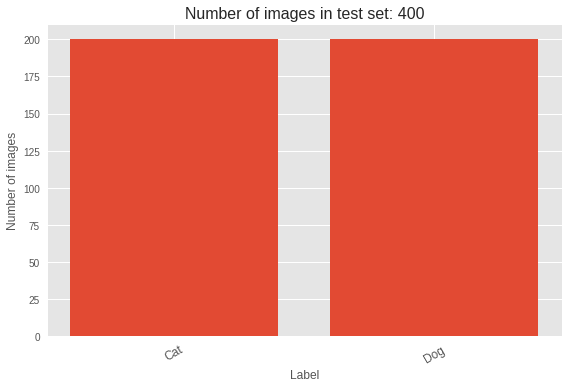


****** Make prediction on test set ******

25/25 [==============================] - 4s 142ms/step

****** Calculate classification report ******


Model achieves 97.0% accuracy on test set

              precision    recall  f1-score   support

         Cat       0.97      0.97      0.97       200
         Dog       0.97      0.96      0.97       200

   micro avg       0.97      0.97      0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


****** Plot confusion matrix ******



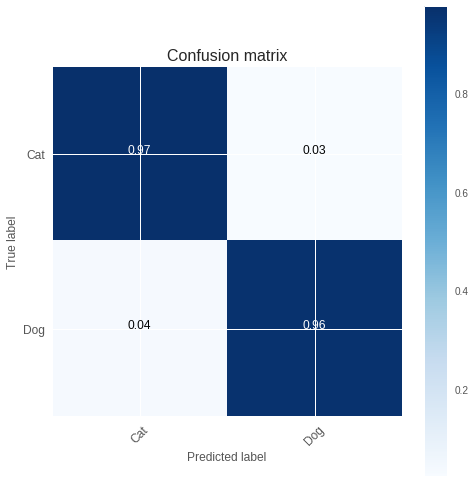

In [8]:
from imageatm.components import Evaluation

e = Evaluation(image_dir=dp.image_dir, job_dir=dp.job_dir)

e.run()

In [0]:
c, w = e.get_correct_wrong_examples(label=1)

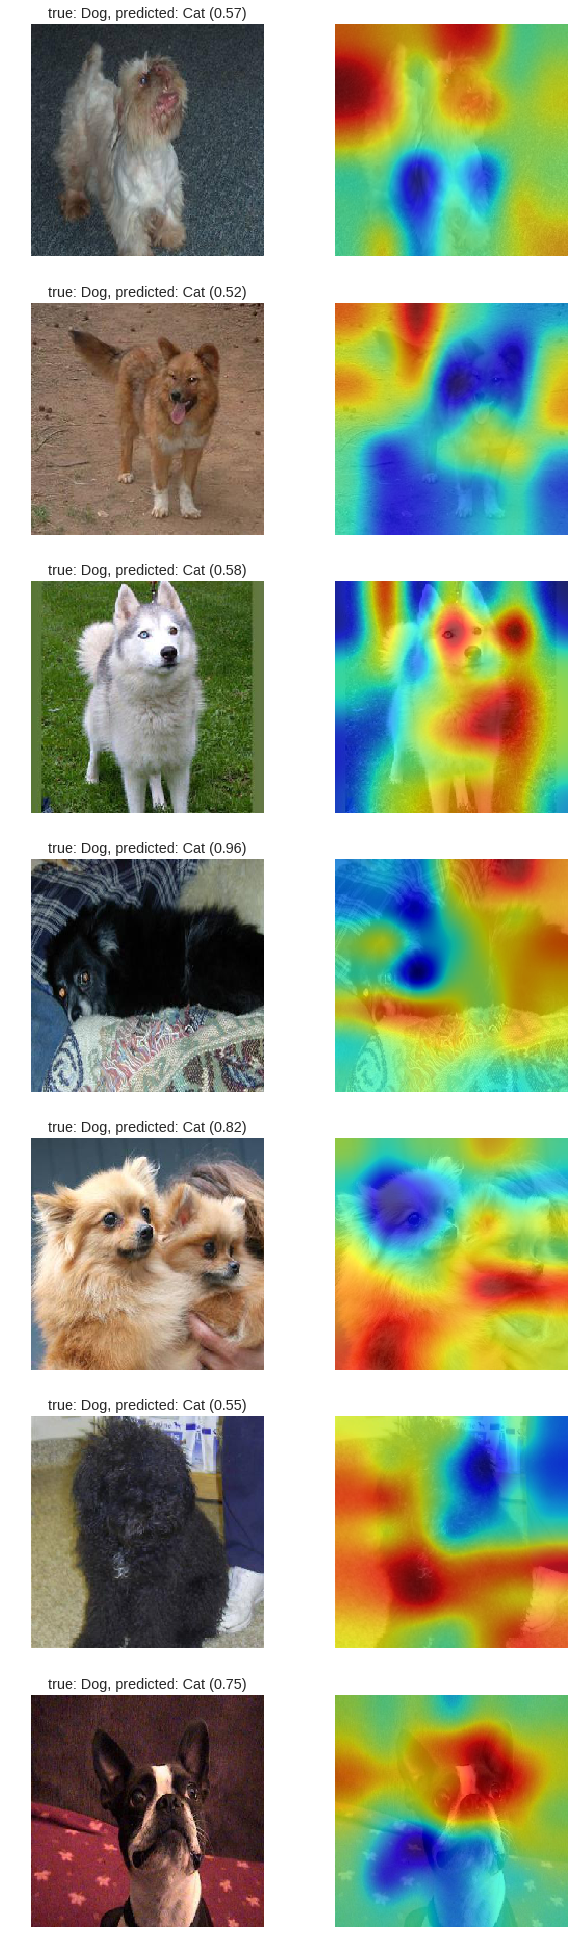

In [10]:
e.visualize_images(w, show_heatmap=True)

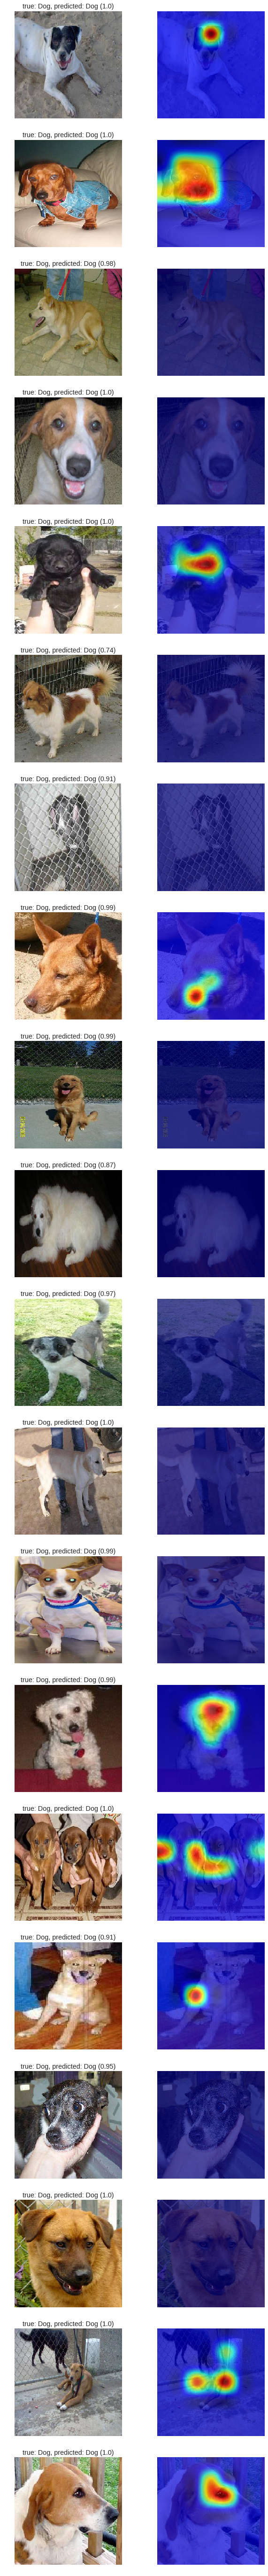

In [11]:
e.visualize_images(c, show_heatmap=True)